In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ptitprince as pt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [11]:
# Read the csv file for QMOF dataset
df = pd.read_csv('../data/QMOF/qmof_database/qmof_database/qmof.csv', sep=',')
df

/var/folders/35/gl327bks7436kv0058ybgznc0000gn/T/ipykernel_42323/4033597631.py:2: DtypeWarning: Columns (40,41,43,44,45,46,47,49,50,51,52,53,55,56,57,65,66,67,68,69,77,78,79,80,81,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/QMOF/qmof_database/qmof_database/qmof.csv', sep=',')


,qmof_id,name,info.formula,info.formula_reduced,info.mofid.mofid,info.mofid.mofkey,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.mofid.topology,...,outputs.hse06.energy_elec,outputs.hse06.net_magmom,outputs.hse06.bandgap,outputs.hse06.cbm,outputs.hse06.vbm,outputs.hse06.directgap,outputs.hse06.bandgap_spins,outputs.hse06.cbm_spins,outputs.hse06.vbm_spins,outputs.hse06.directgap_spins
0,qmof-8a95c27,ABACUF01_FSR,Ba2CuC6H14O16,Ba2CuC6H14O16,NaN,NaN,"['O', '[Ba]', '[Cu]']",['[O-]C=O'],O.[Ba].[Cu].[O-]C=O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,qmof-019ba28,ABALOF_FSR,Cu12C36H56I16N4S4,Cu3C9H14I4NS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,qmof-830ed1c,ABAVIJ_FSR,Co4C48H32N8O16,CoC12H8N2O4,[Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0,Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl,['[Co]'],['[O-]C(=O)c1ccncc1'],[Co].[O-]C(=O)c1ccncc1,rtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,qmof-5bd4a24,ABAVOP_FSR,Co4C48H32N8O16,CoC12H8N2O4,[Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0,Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl,['[Co]'],['[O-]C(=O)c1ccncc1'],[Co].[O-]C(=O)c1ccncc1,rtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,qmof-644aab4,ABAXUZ_FSR,Zn2C50H32N6O8S4,ZnC25H16N3O4S2,NaN,NaN,['[Zn][Zn]'],"['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...",[O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...,NaN,...,-811.553859,0.0,2.901747,2.246703,-0.655044,True,"[None, None]","[None, None]","[None, None]","[None, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-7aebbbb,tobacco_srsb_sym_3_on_2_sym_3_mc_0_L_2,Cu12C84H60N24,CuC7H5N2,N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=CC...,Cu.IBPUNEAULYEGJU.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=...,N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=CC...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20370,qmof-9a04c15,tobacco_srsb_sym_3_on_2_sym_3_mc_0_L_6,Cu12C84H48N60,CuC7H4N5,N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1=C...,Cu.JWLDCPHWRGZUAB.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1...,N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1=C...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20371,qmof-0dce90f,tobacco_srsb_sym_3_on_2_sym_3_mc_0__,Cu12C60H36N24,CuC5H3N2,N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]N=...,Cu.PJSMFZDMZONQKK.MOFkey-v1.srs,"['[Cu]', '[Cu][Cu]']",['N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]...,N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]N=...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20372,qmof-955fe88,tobacco_srsb_sym_3_on_4_sym_3_mc_0_L_2,Cu12C112H72N24,Cu3C28H18N6,N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C]2...,Cu.WCJPEIPZJUESBA.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C...,N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C]2...,srs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Any structural information (info.) containing SMILES code retained. All columns related to DFT simulation details (inputs.) dropped.

In [12]:
columns_to_remove = [
    'name', 'info.formula', 'info.formula_reduced',
       'info.mofid.mofid', 'info.mofid.mofkey', 'info.mofid.topology', 'info.symmetry.spacegroup',
       'info.symmetry.spacegroup_number', 'info.symmetry.spacegroup_crystal',
        'info.symmetry.pointgroup',
        'info.synthesized', 'info.source', 'info.doi',
       'inputs.pbe.theory',
       'inputs.pbe.pseudopotentials', 'inputs.pbe.encut', 'inputs.pbe.kpoints',
       'inputs.pbe.gamma', 'inputs.hse06.theory',
       'inputs.hse06.pseudopotentials', 'inputs.hse06.encut', 'inputs.hse06.kpoints',
       'inputs.hse06.gamma', 'inputs.hle17.theory',
       'inputs.hle17.pseudopotentials', 'inputs.hle17.encut', 'inputs.hle17.kpoints',
       'inputs.hle17.gamma', 'inputs.hse06_10hf.theory',
       'inputs.hse06_10hf.pseudopotentials', 'inputs.hse06_10hf.encut', 'inputs.hse06_10hf.kpoints',
       'inputs.hse06_10hf.gamma'
] # Please update based on the columns you want to remove

df.drop(columns_to_remove, axis=1, inplace=True)
print(len(df.columns), 'columns remaining')

61 columns remaining


## Distribution of bandgaps (target property) at each simulated level of theory:

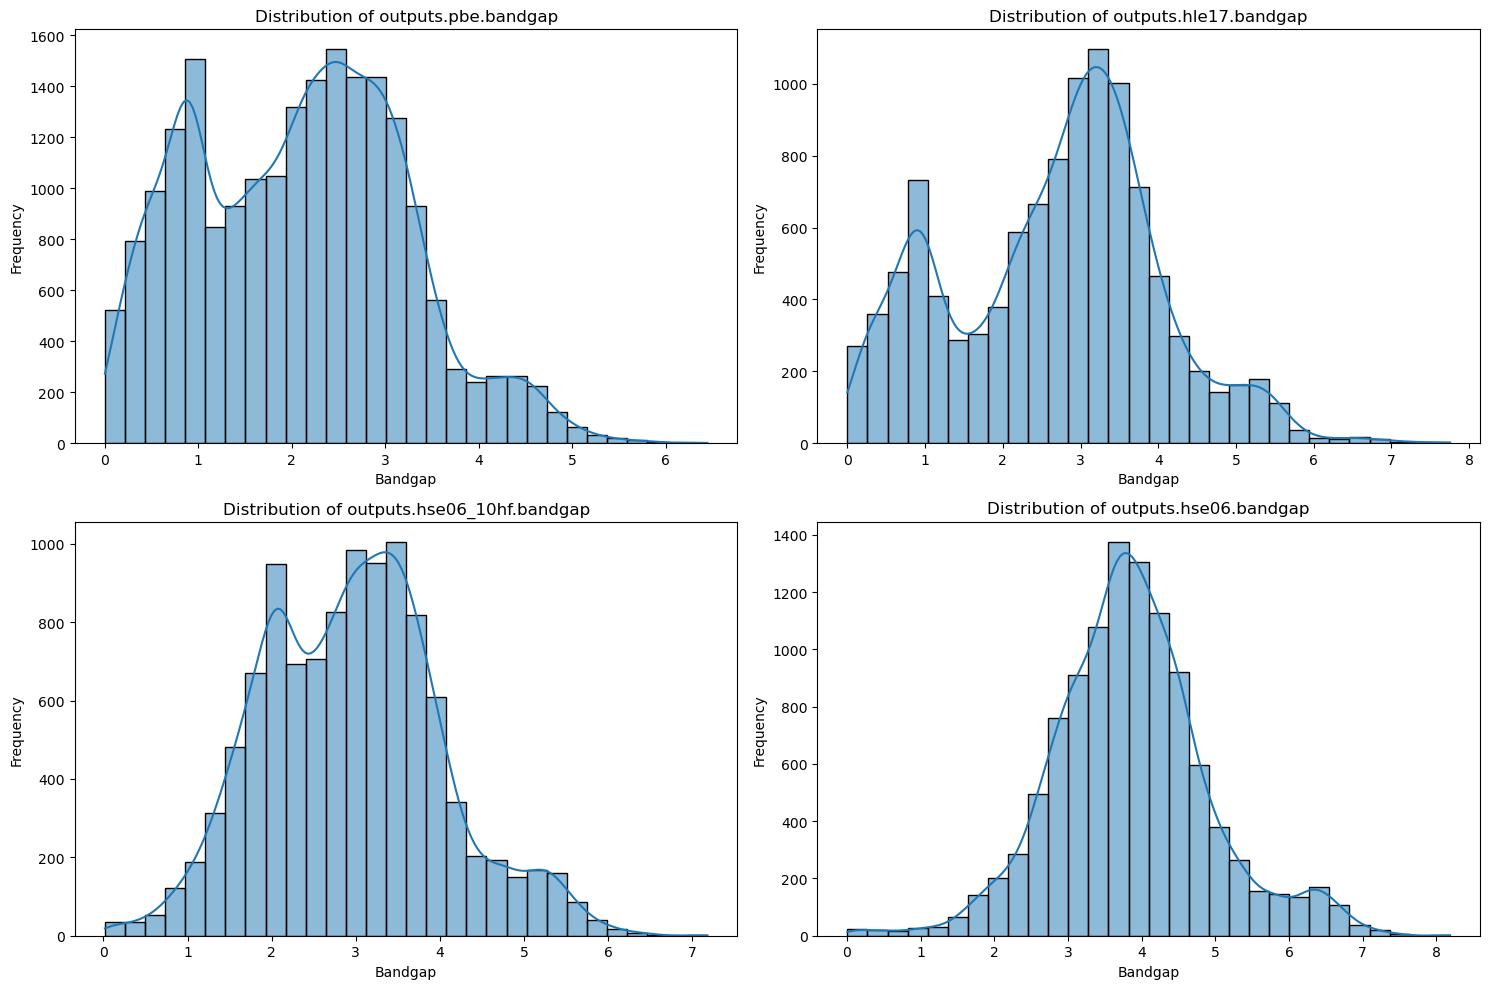

In [13]:
# List of bandgap columns
bandgap_columns = [
    'outputs.pbe.bandgap',
    'outputs.hle17.bandgap',
    'outputs.hse06_10hf.bandgap',
    'outputs.hse06.bandgap'
]

# Plot the distribution of bandgap data for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(bandgap_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Bandgap')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Melt the DataFrame to long format for seaborn
#df_melted = df[bandgap_columns].melt(var_name='Simulation Level', value_name='Bandgap')

# Plot the violin plots
#plt.figure(figsize=(12, 8))
#sns.violinplot(x='Simulation Level', y='Bandgap', data=df_melted, palette="Set2")
#plt.title('Distribution of Bandgaps at Each Simulated Level of Theory')
#plt.xlabel('Simulation Level')
#plt.ylabel('Bandgap')
#plt.xticks(rotation=45)
#plt.show()

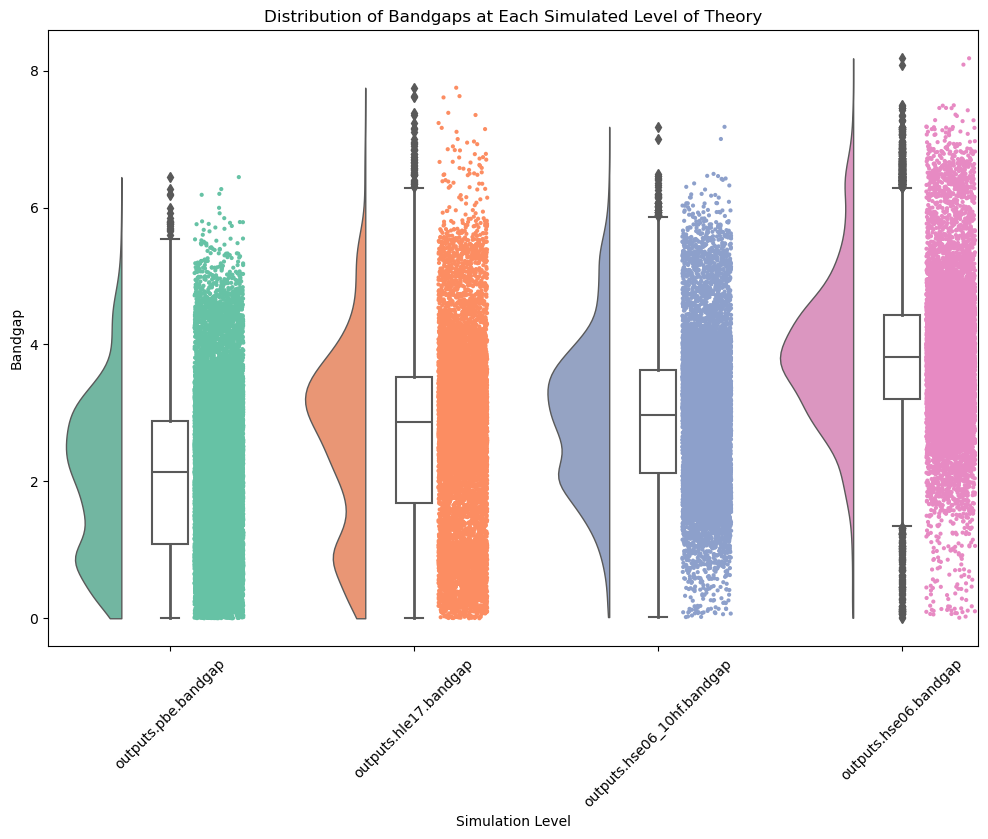

In [15]:
# Melt the DataFrame to long format for seaborn
df_melted = df[bandgap_columns].melt(var_name='Simulation Level', value_name='Bandgap')

# Plot the raincloud plots
plt.figure(figsize=(12, 8))
ax = pt.RainCloud(x='Simulation Level', y='Bandgap', data=df_melted, 
                  palette="Set2", bw=.2, width_viol=.6, ax=None, orient='v', move=.2)
plt.title('Distribution of Bandgaps at Each Simulated Level of Theory')
plt.xlabel('Simulation Level')
plt.ylabel('Bandgap')
plt.xticks(rotation=45)
plt.show()

The above plot shows that for two of the simulated levels – pbe and hle17, band gap distribution has two peaks. This means these respective simulation levels identify and predict differently for two subsets in the dataset. i. e. suggest there are distinctions in the nature of MOFs in the dataset. Is this a shortcoming of the simulated level or a true physical behaviour? Meanwhile the other two simulation levels – hse06 and hse06_10hf, show almost one distribution in the band gaps. The original work further separated the dataset into two subsets based on their elctonic character, and found indeed this happens because pbe (and hle17) has shortcomings in predicting band gaps of these two types of electronic character, and in principle there shoudn't be a distinction between the band gaps predicted for those. In this sense, hse06 (and hse06_10hf) simulated levels are much better at predicting band gaps in spite of different electronic characters of the MOF materials in the dataset.

## Corelation between target and other input columns:

Correlations for outputs.pbe.bandgap:
outputs.pbe.bandgap                1.000000
outputs.hse06_10hf.bandgap         0.971586
outputs.hle17.bandgap              0.946211
outputs.hse06.bandgap              0.839573
outputs.hle17.cbm                  0.677185
outputs.hse06_10hf.cbm             0.568446
outputs.hse06.cbm                  0.495111
outputs.pbe.cbm                    0.461470
info.density                       0.194981
outputs.pbe.energy_elec            0.075135
outputs.pbe.energy_total           0.074954
outputs.pbe.energy_vdw             0.051977
outputs.hse06.energy_vdw          -0.011936
outputs.hse06_10hf.energy_vdw     -0.013412
outputs.hse06.energy_total        -0.048707
outputs.hse06_10hf.energy_total   -0.048842
outputs.hse06.energy_elec         -0.049006
outputs.hse06_10hf.energy_elec    -0.049155
info.natoms                       -0.053592
info.volume                       -0.068558
outputs.hle17.energy_elec         -0.110887
outputs.hle17.energy_total        -0.1

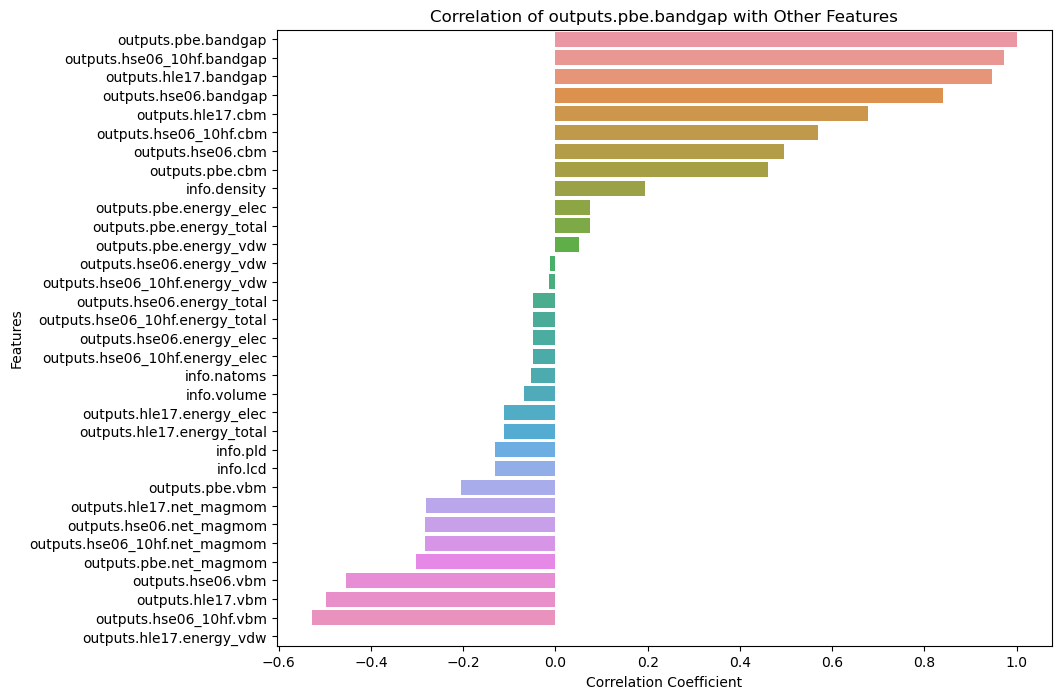

Correlations for outputs.hle17.bandgap:
outputs.hle17.bandgap              1.000000
outputs.pbe.bandgap                0.946211
outputs.hse06_10hf.bandgap         0.918829
outputs.hse06.bandgap              0.798814
outputs.hle17.cbm                  0.753461
outputs.pbe.cbm                    0.627577
outputs.hse06_10hf.cbm             0.587129
outputs.hse06.cbm                  0.504218
info.density                       0.093041
info.natoms                        0.070006
info.volume                        0.037799
outputs.pbe.energy_vdw            -0.001621
outputs.hse06.energy_vdw          -0.007349
outputs.hse06_10hf.energy_vdw     -0.008729
outputs.pbe.energy_total          -0.025592
outputs.pbe.energy_elec           -0.025864
outputs.hse06_10hf.energy_total   -0.026629
outputs.hse06_10hf.energy_elec    -0.026784
outputs.hse06.energy_total        -0.026893
outputs.hse06.energy_elec         -0.027050
info.pld                          -0.063466
info.lcd                          -0

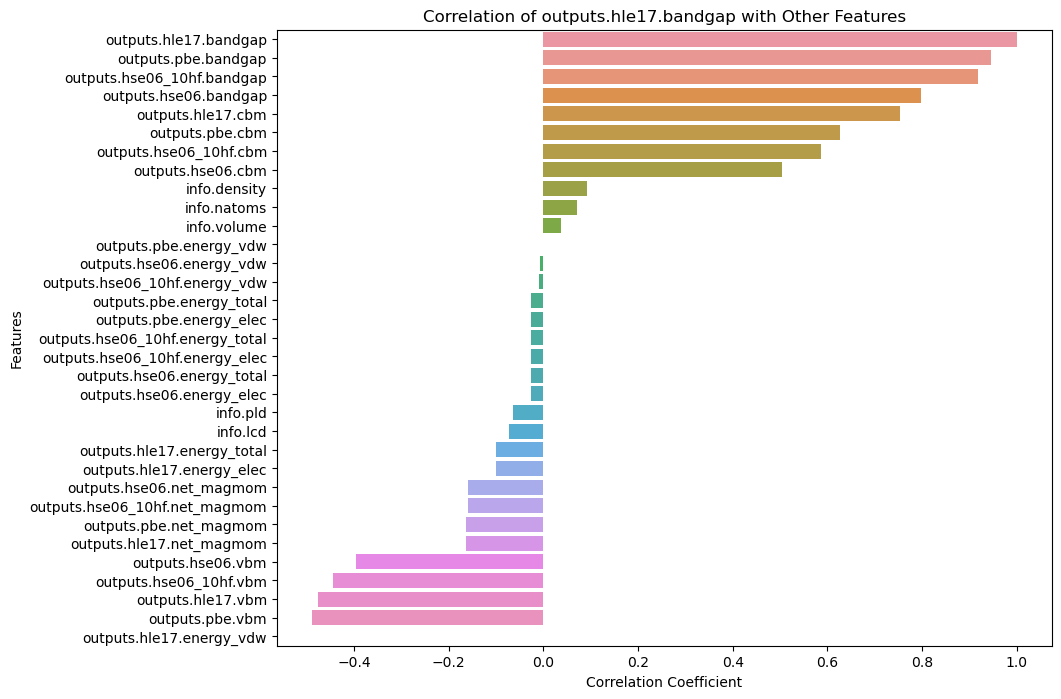

Correlations for outputs.hse06_10hf.bandgap:
outputs.hse06_10hf.bandgap         1.000000
outputs.pbe.bandgap                0.971586
outputs.hse06.bandgap              0.939665
outputs.hle17.bandgap              0.918829
outputs.hle17.cbm                  0.624280
outputs.pbe.cbm                    0.589655
outputs.hse06_10hf.cbm             0.581647
outputs.hse06.cbm                  0.546437
info.density                       0.065637
info.natoms                        0.054949
outputs.pbe.energy_vdw             0.047914
outputs.hse06.energy_vdw           0.045337
outputs.hse06_10hf.energy_vdw      0.044188
info.volume                        0.008797
outputs.pbe.energy_total          -0.014190
outputs.pbe.energy_elec           -0.014969
outputs.hse06_10hf.energy_total   -0.016637
outputs.hse06_10hf.energy_elec    -0.017296
outputs.hse06.energy_total        -0.018349
outputs.hse06.energy_elec         -0.018975
outputs.hle17.energy_elec         -0.053894
outputs.hle17.energy_total     

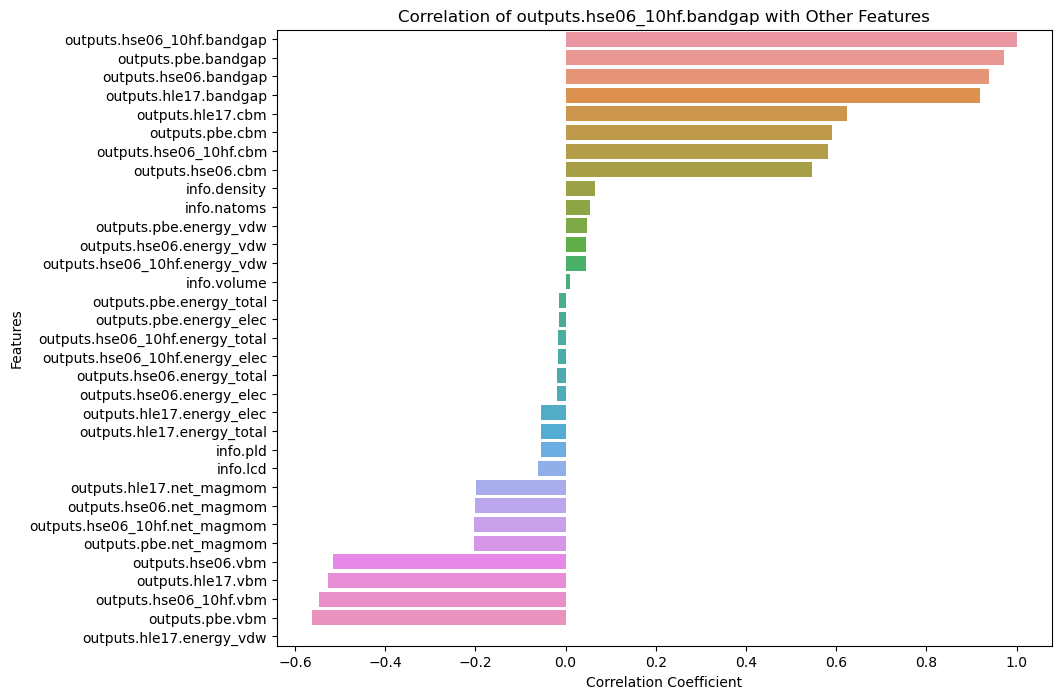

Correlations for outputs.hse06.bandgap:
outputs.hse06.bandgap              1.000000
outputs.hse06_10hf.bandgap         0.939665
outputs.pbe.bandgap                0.839573
outputs.hle17.bandgap              0.798814
outputs.hse06.cbm                  0.576282
outputs.hse06_10hf.cbm             0.545467
outputs.pbe.cbm                    0.516617
outputs.hle17.cbm                  0.491927
outputs.hse06.energy_vdw           0.132451
outputs.hse06_10hf.energy_vdw      0.132435
outputs.pbe.energy_vdw             0.131717
outputs.pbe.energy_total           0.055776
outputs.pbe.energy_elec            0.054724
outputs.hse06_10hf.energy_total    0.052124
outputs.hse06_10hf.energy_elec     0.051120
outputs.hse06.energy_total         0.047247
outputs.hse06.energy_elec          0.046292
info.density                       0.044484
outputs.hle17.energy_total         0.026966
outputs.hle17.energy_elec          0.026966
info.natoms                       -0.012833
info.pld                          -0

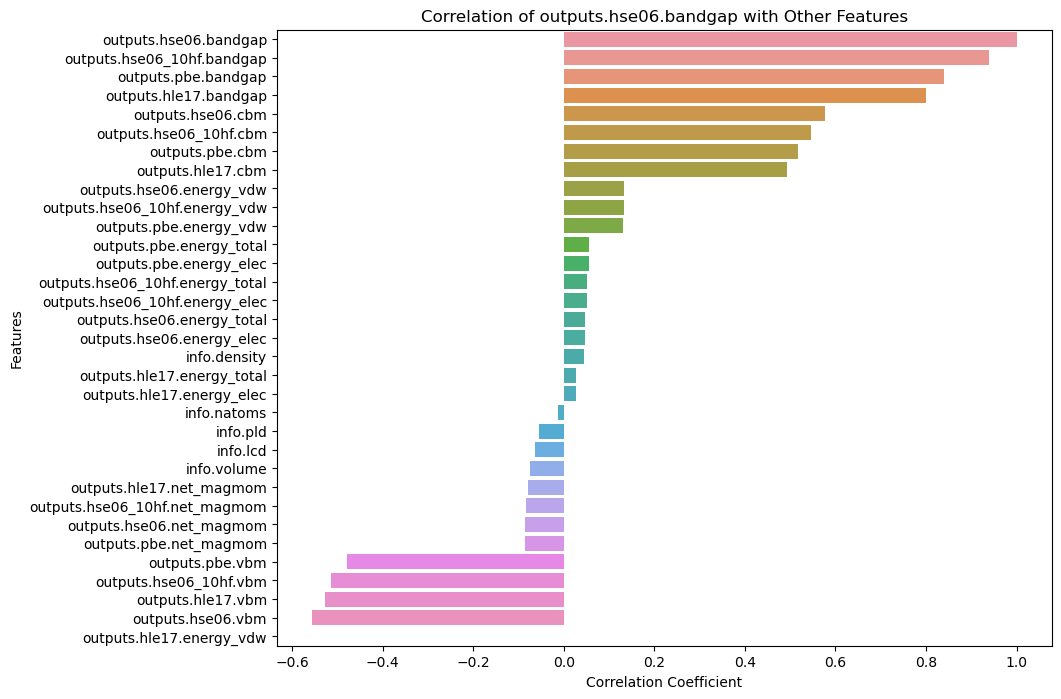

In [16]:
# Filter out non-numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Loop through each bandgap column and plot correlations
for bandgap_column in bandgap_columns:
    if bandgap_column in df_numeric.columns:
        # Calculate correlations
        correlations = df_numeric.corr()[bandgap_column].sort_values(ascending=False)

        # Display the correlations
        print(f'Correlations for {bandgap_column}:')
        print(correlations)

        # Plot the correlations
        plt.figure(figsize=(10, 8))
        sns.barplot(x=correlations.values, y=correlations.index)
        plt.title(f'Correlation of {bandgap_column} with Other Features')
        plt.xlabel('Correlation Coefficient')
        plt.ylabel('Features')
        plt.show()
    else:
        print(f'{bandgap_column} is not in the numeric columns of the DataFrame.')

### What do these correlations tell? Can we get some idea which columns to retain/drop based on these?

1. There's a high degree of correlation between the different simulated levels.

2. Column names with 'cbm' and 'vbm' are properties related to band edge positions and can control the band gap. They have moderate poitive to negative correlations, respectively.

3. Column names with 'info.lcd' and 'info.pld' are properties related to pores in MOFs. While not directly related to electronic properties like band gaps, they are often used to predict the gas storage capacities of these MOFs. Also observed sometimes is increased conductivity with inceased pore size. These have weak negative correlations.

4. 'info.density' is related to overall structure, with weak positive correlation.

5. Net magnetization reported in 'net_magmom' column, indicates magnetic effects that come from electronic spin states of these materials. Moderate negative correlation.

6. Energetic parameters in column names 'energy_total' and 'energy_elec' (total energy, electronic energy) tell about the stability of MOF and unrelated to band gap. Almost no correlation.